# 1. Train and test entire dataset

In [1]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
X = iris.data

y = iris.target

### Checking Logistic Regression model

In [8]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [11]:
linlog = LogisticRegression(solver = 'liblinear', multi_class= 'ovr')

In [12]:
linlog.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
check = linlog.predict(X) # checks for X if correctly predicted

In [14]:
len(check)

150

In [17]:
type(check)

numpy.ndarray

In [20]:
(check == y).sum() #Almost 144 correct , NAIVE method to evaluate

144

In [21]:
from sklearn import metrics

In [24]:
print(metrics.accuracy_score(y, check)*100)

96.0


### Now checking on KNN model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [37]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
check_knn5 = knn.predict(X)

In [40]:
print(metrics.accuracy_score(y, check_knn5)*100)

#96.6666..% for k = 5
#100% for k = 1

96.66666666666667


# 2. Train/Test model
Split dataset into 2 parts, train 1 part and test on other

In [41]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4
                                                   ,random_state = 4)

In [69]:
knn_train = KNeighborsClassifier(n_neighbors = 5)
knn_train.fit(X_train, y_train)
linlog_train = LogisticRegression(solver = 'liblinear', multi_class='ovr')
linlog_train.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
check_train = knn_train.predict(X_test)
checklog_train = linlog_train.predict(X_test)

In [72]:
print("KNN : ",metrics.accuracy_score(y_test, check_train)*100)
print("Linear regression : ", metrics.accuracy_score(y_test, checklog_train)*100)

KNN :  96.66666666666667
Linear regression :  93.33333333333333


### Checking suitable value of k

In [73]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred)*100)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Score')

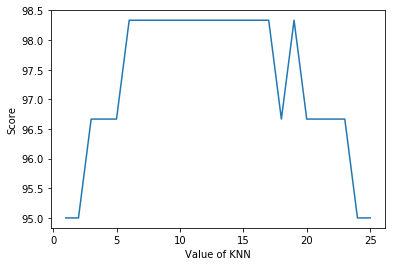

In [76]:
plt.plot(k_range, scores)
plt.xlabel('Value of KNN')
plt.ylabel('Score')